In [1]:
import pandas as pd
import numpy as np
import datetime
import string
import os
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
RAW_DATA_PATH = '/Users/vuhoangnguyen/Research/'
RAW_DATA = os.path.join(RAW_DATA_PATH, 'raw_data.csv')
raw_dataset = pd.read_csv(RAW_DATA, keep_default_na=False)
DATA = os.path.join(Path.cwd().parents[0], 'Data/out.csv')
dataset = pd.read_csv(DATA, keep_default_na=False)

In [3]:
gender = ['male','female']
patient_per_gender = np.zeros(2)
patient_per_gender[1] = dataset['Female'].sum()
patient_per_gender[0] = dataset.shape[0] - patient_per_gender[1]
percent = np.round(patient_per_gender * 100 / dataset.shape[0], 1)

gender = pd.DataFrame([gender,patient_per_gender,[str(i)+'%' for i in percent]], 
                        index = ['Gender','Number of patients','Percentage']).T
display(gender)

,Gender,Number of patients,Percentage
0,male,1297.0,62.6%
1,female,775.0,37.4%


In [4]:
column_name = ['Measles','Pneumonia','Bronchopneumonia','Other diagnosis']
val = np.array([dataset[i].sum() for i in column_name])
percent = np.round(val * 100 / dataset.shape[0], 1)

disgnosis_upon_admission = pd.DataFrame([column_name,val,[str(i)+'%' for i in percent]],
                                        index = ['Diagnosis upon admission','Number of patients','Percentage']).T
disgnosis_upon_admission

,Diagnosis upon admission,Number of patients,Percentage
0,Measles,848,40.9%
1,Pneumonia,661,31.9%
2,Bronchopneumonia,749,36.1%
3,Other diagnosis,391,18.9%


In [5]:
column_name = ['respiratory_syncytical_virus', 'adenovirus', 'pertussis', 'healthcare_associated_infection']
new_column_name = ['Respiratory Syncytical Virus (RSV)','denovirus', 'Pertussis', 'Other HAIs']
val = np.array([dataset[i].sum() for i in column_name])
percent = np.round(val * 100 / dataset.shape[0], 1)
healthcare_associated_infection = pd.DataFrame([new_column_name,val,[str(i)+'%' for i in percent]],
                                                index = ['Healthcare-associated infection','Number of patients','Percentage']).T
healthcare_associated_infection

,Healthcare-associated infection,Number of patients,Percentage
0,Respiratory Syncytical Virus (RSV),30,1.4%
1,denovirus,95,4.6%
2,Pertussis,17,0.8%
3,Other HAIs,18,0.9%


In [6]:
prefix = 'co-infection-'
column_name = ['influenza-a','influenza-b','streptococus-aerius','streptococus-pneumonia']
val = np.array([dataset[prefix+i].sum() for i in column_name])
percent = np.round(val * 100 / dataset.shape[0], 1)

co_infections = pd.DataFrame([column_name,val,[str(i)+'%' for i in percent]],
                index=['Co-infections','Number of patients','Percentage']).T
co_infections

,Co-infections,Number of patients,Percentage
0,influenza-a,16,0.8%
1,influenza-b,4,0.2%
2,streptococus-aerius,3,0.1%
3,streptococus-pneumonia,2,0.1%


In [7]:
prefix = 'complication-'
column_name = ['gastroentiritis','middle-ear-infec','conjunctivitis','laryngitis','pneumonia-bronchitis',
'febrile-seizures','septic-shock-sepsis']
val = np.array([dataset[prefix+i].sum() for i in column_name])
percent = np.round(val * 100 / dataset.shape[0], 1)

complication = pd.DataFrame([column_name,val,[str(i)+'%' for i in percent]],
                index=['Complication','Number of patients','Percentage']).T
complication

,Complication,Number of patients,Percentage
0,gastroentiritis,51,2.5%
1,middle-ear-infec,30,1.4%
2,conjunctivitis,2,0.1%
3,laryngitis,7,0.3%
4,pneumonia-bronchitis,1413,68.2%
5,febrile-seizures,10,0.5%
6,septic-shock-sepsis,4,0.2%


In [8]:
# Calculate number of patients in each place of exposure
place = ['NHP', 'Another hospital', 'Community', 'Unknown']
patient_per_place = np.zeros(4)
for i in dataset['place_of_exposure']:
    if i == 'NHP':
        patient_per_place[0] += 1
    elif i == 'Another hospital':
        patient_per_place[1] += 1
    elif i == 'community':
        patient_per_place[2] += 1
    else:
        patient_per_place[3] += 1

percent = np.round(patient_per_place * 100 / dataset.shape[0], 1)

poe = pd.DataFrame([place, patient_per_place, [str(i) + '%' for i in percent]],
                    index=['Place of exposure','Number of patient','Percentage']).T
poe

,Place of exposure,Number of patient,Percentage
0,NHP,547.0,26.4%
1,Another hospital,241.0,11.6%
2,Community,1281.0,61.8%
3,Unknown,3.0,0.1%


In [35]:
total = 2072
vac = ['0','>=1','NA']
table = np.zeros((3))

for i in range(3):
        table[i] = len(dataset[ (dataset['New vaccination'] == vac[i])])

np.set_printoptions(suppress=True)
print(table)
print(np.round(100 * table/total,1))

[1808.  204.   60.]
[87.3  9.8  2.9]
2072.0


In [11]:
def print_stats(array,array_name):
    array = np.array(array).astype(float)
    min = round(np.min(array), 1)
    max = round(np.max(array), 1)
    mean = round(np.mean(array), 1)
    median = round(np.median(array), 1)
    first_quartile = round(np.percentile(array, 25), 1)
    third_quartile = round(np.percentile(array, 75), 1)

    print(f'Min {array_name} = {min}')
    print(f'Max {array_name} = {max}')
    print(f'Mean {array_name} = {mean}')
    print(f'Median {array_name} = {median}')
    print(f'First quartile {array_name} = {first_quartile}')
    print(f'Third quartile {array_name} = {third_quartile}')

In [32]:
total = 2072
age = ['0 - 9','9 - 60','>= 60']
table = np.zeros((3))

for i in range(3):
        table[i] = len(dataset[ (dataset['New Age group (in months)'] == age[i]) ])

np.set_printoptions(suppress=True)
print(table)
print(np.round(100 * table/total,1))

[902. 984. 186.]
[43.5 47.5  9. ]


In [33]:
decimal_month_at_admission = []
for i in range(len(dataset)):
    x = dataset.at[i,'admission_date']
    y = pd.to_datetime(x)
    z = dataset.at[i,'dob']
    t = pd.to_datetime(z)
    decimal_month_at_admission += [(y-t).days / 30]

print_stats(decimal_month_at_admission, 'age at admission (month)')

Min age at admission (month) = 0.1
Max age at admission (month) = 233.5
Mean age at admission (month) = 20.4
Median age at admission (month) = 9.6
First quartile age at admission (month) = 7.0
Third quartile age at admission (month) = 16.9


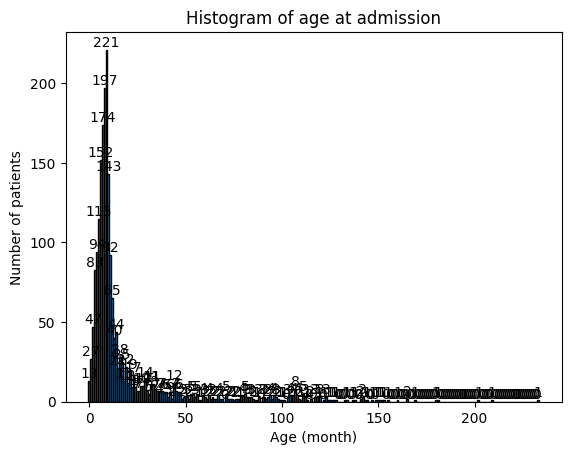

In [13]:
month_at_admission = dataset['age_at_admission'].to_numpy()
max_month = np.max(month_at_admission)
val,bin = np.histogram(month_at_admission, bins=np.arange(max_month+2))

fig, ax = plt.subplots()

# Set title, add labels
ax.set_title("Histogram of age at admission")
ax.set_xlabel('Age (month)')
ax.set_ylabel('Number of patients')

# can add log = 'True' for better visualization
ax.hist(month_at_admission,bins = np.arange(max_month+2),align='left',edgecolor='black',label='Age at admission')
rects = ax.patches
  
for rect, label in zip(rects, val):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label, ha='center', va='bottom')

# remove this line to see the box plot
#plt.close()

In [14]:
duration_of_stay = dataset['duration_of_stay'].to_numpy()
#print_stats(duration_of_stay,'duration of stay')

duration_group = ['0 - <7','7 - <21','>= 21']
duration_marker = [0, 7, 21]
occurance_of_duration_group = np.zeros(len(duration_group))

for i in duration_of_stay:
    for j in range(2,-1,-1):
        if i >= duration_marker[j]:
            occurance_of_duration_group[j] += 1
            break

percent = np.round(occurance_of_duration_group * 100 / dataset.shape[0],1)
stay_duration = pd.DataFrame([duration_group,occurance_of_duration_group,[str(i)+'%' for i in percent]],
                             index=['Duration of stay','Number of patients','Percentage']).T
stay_duration

,Duration of stay,Number of patients,Percentage
0,0 - <7,1042.0,50.3%
1,7 - <21,739.0,35.7%
2,>= 21,291.0,14.0%


In [15]:
test_date_to_test_result = dataset['testresult_date'].to_numpy(dtype='datetime64') - dataset['test_date'].to_numpy(dtype='datetime64')

print_stats(test_date_to_test_result,'test duration')

day_group = [0,1,2,3]
occurance_of_day_group = [0] * 4

for i in test_date_to_test_result:
    for j in range(3,-1,-1):
        if i >= day_group[j]:
            occurance_of_day_group[j] += 1
            break

test_duration = pd.DataFrame([occurance_of_day_group], columns=['0','1','2','> 2'])
test_duration

Min test duration = 0.0
Max test duration = 5.0
Mean test duration = 0.7
Median test duration = 1.0
First quartile test duration = 0.0
Third quartile test duration = 1.0


,0,1,2,> 2
0,796,1106,155,15


In [16]:
onset_date_to_admission_date = dataset['admission_date'].to_numpy(dtype='datetime64') - dataset['onset_date'].to_numpy(dtype='datetime64')
onadmission_group = ['<0','0 - <3','3 - <7','7 - <14','>= 14']
#print_stats(onset_date_to_admission_date,'onset to admission')

onadmission_marker = [-10**9, 0, 3, 7, 14]
occurance_of_onadimission = np.zeros(len(onadmission_group))

for i in onset_date_to_admission_date:
    for j in range(len(onadmission_group)-1,-1,-1):
        if i >= onadmission_marker[j]:
            occurance_of_onadimission[j] += 1
            break

percent = np.round(occurance_of_onadimission * 100 / dataset.shape[0],1)
onadmission_pd = pd.DataFrame([onadmission_group,occurance_of_onadimission,[str(i)+'%' for i in percent]],
                             index=['Duration between onset and admission','Number of patients','Percentage']).T
onadmission_pd

,Duration between onset and admission,Number of patients,Percentage
0,<0,611.0,29.5%
1,0 - <3,916.0,44.2%
2,3 - <7,452.0,21.8%
3,7 - <14,47.0,2.3%
4,>= 14,46.0,2.2%


In [17]:
onsettest_group = ['< 0','0 - <24','24 - <48','>= 48']
table = np.zeros(len(onsettest_group))

for i in range(len(onsettest_group)):
    table[i] = len( dataset[dataset['Duration between onset and test (detection time) (in hours)'] == onsettest_group[i]] )

percent = np.round(table * 100 / dataset.shape[0],1)
onsettest_pd = pd.DataFrame([onsettest_group, table,[str(i)+'%' for i in percent]],
                                index=['Duration between onset and test','Number of patients','Percentage']).T
onsettest_pd

,Duration between onset and test,Number of patients,Percentage
0,< 0,23.0,1.1%
1,0 - <24,554.0,26.7%
2,24 - <48,438.0,21.1%
3,>= 48,1057.0,51.0%


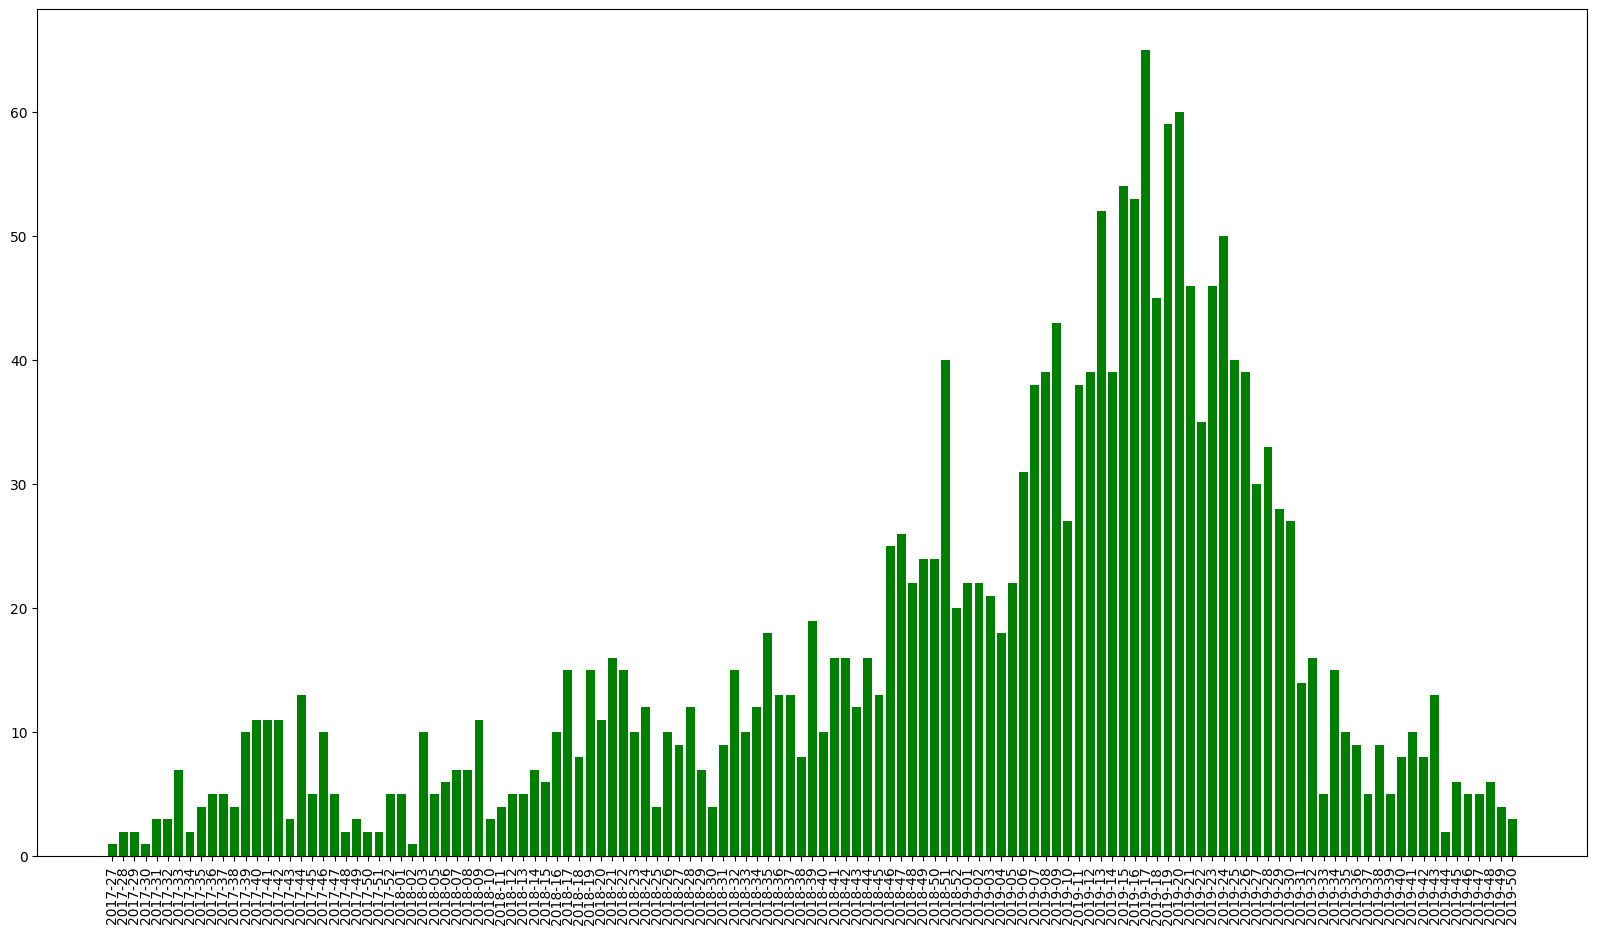

,Year,Number of patients,Percentage
0,2017,132,6.4%
1,2018,621,30.0%
2,2019,1319,63.7%


In [18]:
admission = [datetime.datetime.strptime(_, '%Y-%m-%d') for _ in dataset['admission_date'].to_numpy(dtype='str').tolist()]
admission_year = [x.year for x in admission]

occurance_of_year = {}

for i in admission_year:
    if i not in occurance_of_year:
        occurance_of_year[i] = 1
    else:
        occurance_of_year[i] += 1

x = sorted(occurance_of_year.items())
for i in range(len(x)):
    x[i] = list(x[i])
    x[i].append(str(round(x[i][1]*100/dataset.shape[0],1))+'%')
year_occurance = pd.DataFrame(x,columns = ['Year','Number of patients','Percentage'])

admission_datetime = []
week_occurance = {}
for i in admission:
    current_week = i.strftime("%V")
    current_year = i.year
    current_time = str(current_year) + '-' + current_week
    if current_time not in week_occurance:
        week_occurance[current_time] = 1
    else:
        week_occurance[current_time] += 1

dict_list = [(k, v) for k, v in week_occurance.items()]
dict_list.sort()
year_week = [current_week[0] for current_week in dict_list]
week_occurance = [current_week[1] for current_week in dict_list]

plt.subplots(figsize=(20,11))
plt.bar(year_week, week_occurance, color='g')
plt.xticks(rotation=90)

# comment this line to see the bar chart
# plt.close()

plt.show()
display(year_occurance)

In [19]:
respiratory_support = ['oxygen_cannula','CPAP','conventional_mechanical_ventilation','hfo_ventilation','ECMO']
patient_per_mode = np.zeros(len(respiratory_support))
severe = 0  # number of patients who need respiratory support

for i in range(len(dataset)):
    for j in range(len(respiratory_support)-1,-1,-1):
        if dataset.loc[i,respiratory_support[j]] == 1:
            patient_per_mode[j] += 1
            severe += 1
            break

not_severe = dataset.shape[0] - severe
res_percent = np.round(patient_per_mode * 100 / dataset.shape[0] ,1)
ventilation_mode = pd.DataFrame([respiratory_support,patient_per_mode,[str(i)+'%' for i in res_percent]],
                    index = ['Maximal respiratory mode','Number of patients','Percentage']).T
display(ventilation_mode)

clinical_classification = pd.DataFrame([['Severe','Not severe'],[severe,not_severe],
                                        [str(round(severe/dataset.shape[0]*100,1))+'%',str(round(not_severe/dataset.shape[0]*100,1))+'%']],
                                        index=['Clinical classification','Number of patients','Percentage']).T
display(clinical_classification)

,Maximal respiratory mode,Number of patients,Percentage
0,oxygen_cannula,685.0,33.1%
1,CPAP,8.0,0.4%
2,conventional_mechanical_ventilation,144.0,6.9%
3,hfo_ventilation,11.0,0.5%
4,ECMO,1.0,0.0%


,Clinical classification,Number of patients,Percentage
0,Severe,849,41.0%
1,Not severe,1223,59.0%


In [20]:
column_name = ['Dead','Survived']
total_died = dataset['outcome_died'].sum()
patient_result = np.array([total_died,dataset.shape[0]-total_died])

percent = np.round(patient_result * 100 / dataset.shape[0] ,1)
patient_result = pd.DataFrame([column_name,patient_result,[str(i)+'%' for i in percent]],
                                index = ['Clinical outcome','Number of patients','Percentage']).T
patient_result

,Clinical outcome,Number of patients,Percentage
0,Dead,30,1.4%
1,Survived,2042,98.6%


In [21]:
patient_location = dataset[['patient_home_coordinate','distance_to_nhp']].copy()
patient_location.insert(0,'index',range(0, len(patient_location)))
patient_location

,index,patient_home_coordinate,distance_to_nhp
0,0,"21.193090,105.528750",50.175
1,1,"21.255690,105.489280",58.479
2,2,"21.012180,105.814210",2.251
3,3,"18.975670,105.608640",260.791
4,4,"20.891280,106.136410",53.506
...,...,...,...
2067,2067,"18.680380,105.670470",295.232
2068,2068,"19.416320,105.792860",204.174
2069,2069,"23.054850,105.286300",399.714
2070,2070,"20.967980,107.108460",170.784


In [22]:
distance_marker = [0, 20, 200, 500]
distance_group = ['0 - <20','20 - <200','200 - <500','>= 500']
patient_per_distance_group = np.zeros(len(distance_group))
for val in dataset['distance_to_nhp']:
    for i in range(len(distance_marker)-1,-1,-1):
        if val >= distance_marker[i]:
            patient_per_distance_group[i] += 1
            break

percent = np.round(patient_per_distance_group * 100 / dataset.shape[0] ,1)
distance_group_db = pd.DataFrame([distance_group,patient_per_distance_group, [str(i)+'%' for i in percent]],
                                index=['Distance group','Number of patients','Percentage']).T
display(distance_group_db)

,Distance group,Number of patients,Percentage
0,0 - <20,468.0,22.6%
1,20 - <200,1285.0,62.0%
2,200 - <500,305.0,14.7%
3,>= 500,14.0,0.7%


In [23]:
province = dataset['province'].to_numpy(dtype='str')
patient_per_province = {}

for i in province:
    if i in patient_per_province:
        patient_per_province[i] += 1
    else:
        patient_per_province[i] = 1

sorted_province = sorted(patient_per_province.items())
province_list = [i[0] for i in sorted_province]
patient_list = np.array([i[1] for i in sorted_province])
percent = np.round(patient_list * 100 / dataset.shape[0] ,1)
province_stat = pd.DataFrame([province_list,patient_list,[str(i)+'%' for i in percent]],index=['Province','Patient','Percentage']).T
display(province_stat)

,Province,Patient,Percentage
0,Ba Ria - Vung Tau,1,0.0%
1,Bac Giang,53,2.6%
2,Bac Kan,4,0.2%
3,Bac Ninh,106,5.1%
4,Can Tho,1,0.0%
5,Cao Bang,2,0.1%
6,Dak Lak,2,0.1%
7,Dong Nai,2,0.1%
8,Ha Giang,15,0.7%
9,Ha Nam,101,4.9%


In [24]:
part_of_vietnam = ['Ha Noi','Northeastern region','Northwestern region','Red River Delta (except Hanoi)','Central region','Southern region']
patient_per_part = np.zeros(len(part_of_vietnam))
north_province = ['Ha Noi','Bac Kan','Bac Ninh','Bac Giang','Cao Bang','Ha Giang','Ha Nam',
                    'Hai Duong','Hai Phong','Hoa Binh','Hung Yen','Nam Dinh','Ninh Binh','Phu Tho',
                    'Quang Ninh','Thai Binh','Vinh Phuc','Yen Bai','Lao Cai','Son La','Thai Nguyen',
                    'Tuyen Quang','Lai Chau','Lang Son']

central_province = ['Thanh Hoa','Nghe An','Ha Tinh','Quang Binh','Quang Tri','Thua Thien Hue','Quang Nam','Quang Ngai',
                    'Binh Dinh','Phu Yen','Khanh Hoa','Ninh Thuan','Binh Thuan','Kon Tum','Gia Lai','Dak Lak']

south_province = ['Binh Phuoc','Binh Duong','Dong Nai','Tay Ninh','Ba Ria - Vung Tau','Ho Chi Minh','Long An',
                    'Dong Thap','Tien Giang','An Giang','Ben Tre','Can Tho']

northwestern_region = ['Lao Cai','Yen Bai','Lai Chau','Dien Bien','Son La','Hoa Binh']
northeastern_region = ['Ha Giang','Tuyen Quang','Phu Tho','Thai Nguyen','Bac Kan','Cao Bang','Lang Son','Bac Giang','Quang Ninh']
red_river_delta_except_hanoi = ['Hai Phong','Vinh Phuc','Bac Ninh','Hung Yen','Hai Duong','Thai Binh','Nam Dinh','Ninh Binh','Ha Nam']

for i in range(len(province_list)):
    if province_list[i] == 'Ha Noi':
        patient_per_part[0] += patient_list[i]
    if province_list[i] in northwestern_region:
        patient_per_part[1] += patient_list[i]
    if province_list[i] in northeastern_region:
        patient_per_part[2] += patient_list[i]
    if province_list[i] in red_river_delta_except_hanoi:
        patient_per_part[3] += patient_list[i]
    if province_list[i] in central_province:
        patient_per_part[4] += patient_list[i]
    if province_list[i] in south_province:
        patient_per_part[5] += patient_list[i]

percent = np.round(patient_per_part * 100 / dataset.shape[0] ,1)
part_stat = pd.DataFrame([part_of_vietnam,patient_per_part,[str(i)+'%' for i in percent]],index=['Part','Patient','Percentage']).T
display(part_stat)

,Part,Patient,Percentage
0,Ha Noi,714.0,34.5%
1,Northeastern region,100.0,4.8%
2,Northwestern region,207.0,10.0%
3,Red River Delta (except Hanoi),722.0,34.8%
4,Central region,321.0,15.5%
5,Southern region,8.0,0.4%


In [25]:
year_and_province = [[0] * 4 for _ in range(len(province_list))]

for i in range(len(province_list)):
    year_and_province[i][0] = province_list[i]

for i in range(len(dataset)):
    year = int(dataset.at[i,'admission_date'][:4]) - 2016
    index = province_list.index(dataset.loc[i,'province'])
    year_and_province[index][year] += 1

year_and_province_stat = pd.DataFrame(year_and_province,columns=['Province','2017','2018','2019'])
display(year_and_province_stat)

,Province,2017,2018,2019
0,Ba Ria - Vung Tau,0,0,1
1,Bac Giang,3,12,38
2,Bac Kan,1,2,1
3,Bac Ninh,2,27,77
4,Can Tho,0,0,1
5,Cao Bang,0,1,1
6,Dak Lak,1,0,1
7,Dong Nai,0,0,2
8,Ha Giang,1,3,11
9,Ha Nam,3,28,70


In [26]:
underlying_condition_pd = pd.DataFrame([[0]*9 for _ in range(3)],index=['Underlying coditions','Number of patient','Percentage']).T

underlying_condition = ['Underlying conditions - Respiratory system','Underlying conditions - Cardiovascular system',
    'Underlying condition - Gastrointestinal system','Underlying condition - Kidney and urology system',
    'Underlying condition - Immunodeficiency','Underlying condition - Neurological system','Underlying condition - Inherited metabolic disorders',
    'Underlying condition - No underlying diseases','Underlying condition - Other underlying conditions']

for i in range(len(underlying_condition)):
    column_name = underlying_condition[i]
    if 'Underlying conditions - ' in column_name:
        col1 = column_name.replace('Underlying conditions - ','')
    else:
        col1 = column_name.replace('Underlying condition - ','')
    
    col2 = dataset[column_name].sum()
    col3 = str(round(col2/dataset.shape[0]*100,1)) + '%'
    underlying_condition_pd.iloc[i] = [col1,col2,col3]

display(underlying_condition_pd)

,Underlying coditions,Number of patient,Percentage
0,Respiratory system,42,2.0%
1,Cardiovascular system,72,3.5%
2,Gastrointestinal system,94,4.5%
3,Kidney and urology system,46,2.2%
4,Immunodeficiency,12,0.6%
5,Neurological system,73,3.5%
6,Inherited metabolic disorders,15,0.7%
7,No underlying diseases,1585,76.5%
8,Other underlying conditions,159,7.7%


In [27]:
# Find id of patients in each place of exposure (Community, Another hospital, NHP)
ids_each_place = [[],[],[]]
for id, val in enumerate(dataset['place_of_exposure']):
    if val == 'community':
        ids_each_place[0].append(id)
    elif val == 'Another hospital':
        ids_each_place[1].append(id)
    elif val == 'NHP':
        ids_each_place[2].append(id)

first_name = 'Place of exposure'
first_row_val = ['Community','Another health care facility',"Within National Children's Hospital"]

In [28]:
patient_per_place = np.array([len(i) for i in ids_each_place])
percent = np.round(patient_per_place * 100 / dataset.shape[0] ,1)
patient_per_poe = pd.DataFrame([first_row_val,patient_per_place,[str(i)+'%' for i in percent]],
                                index=[first_name,'Number of patient','Percentage']).T
display(patient_per_poe)

,Place of exposure,Number of patient,Percentage
0,Community,1281,61.8%
1,Another health care facility,241,11.6%
2,Within National Children's Hospital,547,26.4%


In [29]:
x = np.array(decimal_month_at_admission)
mean = [round(np.mean(x[ids_each_place[i]]),1) for i in range(3)]
std = [round(np.std(x[ids_each_place[i]]),1) for i in range(3)]

age_month_pd = pd.DataFrame([['mean']+mean,['SD']+std],columns=['Age in months']+first_row_val)
display(age_month_pd)

,Age in months,Community,Another health care facility,Within National Children's Hospital
0,mean,23.5,14.0,16.1
1,SD,32.4,17.5,22.9
